It is highly recommended to use a powerful **GPU**, you can use it for free uploading this notebook to [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb).
<table align="center">
 <td align="center"><a target="_blank" href="https://colab.research.google.com/github/ezponda/intro_deep_learning/blob/main/class/CNN/Object_Tracking_Counting.ipynb">
        <img src="https://colab.research.google.com/img/colab_favicon_256px.png"  width="50" height="50" style="padding-bottom:5px;" />Run in Google Colab</a></td>
  <td align="center"><a target="_blank" href="https://github.com/ezponda/intro_deep_learning/blob/main/class/CNN/Object_Tracking_Counting.ipynb">
        <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png"  width="50" height="50" style="padding-bottom:5px;" />View Source on GitHub</a></td>
</table>

# Object Tracking with Ultralytics YOLO

Object tracking extends the capabilities of object detection by not only identifying and localizing objects within each frame of a video but also maintaining a unique identifier for each detected object across the frames. This process is crucial for applications that require monitoring the movement and behavior of objects over time, such as surveillance, sports analytics, and advanced driver-assistance systems (ADAS).

## Differences Between Object Tracking and Detection

- **Object Detection** is the process of identifying objects within a single image frame and classifying them into predefined categories. It provides the location of the object typically in the form of bounding boxes.

- **Object Tracking**, on the other hand, follows the identified objects from one frame to the next. This involves detecting the object in the initial frame and then tracking the object’s movement across subsequent frames, maintaining a consistent identifier for each object.

## Features of Ultralytics YOLO Object Tracking

Ultralytics YOLO offers enhanced object tracking capabilities:

- **Real-Time Tracking**: Capable of tracking objects seamlessly in high-frame-rate videos, making it suitable for real-time applications.
- **Multiple Tracker Support**: Provides options to select from various established tracking algorithms.
- **Customizable Tracker Configurations**: Allows adjustment of tracker parameters to suit specific requirements, enhancing flexibility and performance.

## Available Trackers in Ultralytics YOLO

Ultralytics YOLO supports different tracking algorithms, including:

- **BoT-SORT**: Default tracking algorithm, suitable for a variety of tracking needs. Enable with `tracker='botsort.yaml'`.
- **ByteTrack**: Known for its high performance, especially in dense scenes. Enable with `tracker='bytetrack.yaml'`.

## Implementing Object Tracking

To apply object tracking with Ultralytics YOLO, you can use the following code snippets:

### Loading and Running a Tracker

```python
from ultralytics import YOLO

# Load a pretrained model
model = YOLO('yolov8n.pt')  # Substitute with yolov8n-seg.pt or yolov8n-pose.pt as needed

# Perform tracking on a video source
results = model.track(source="path/to/video.mp4", show=True, tracker="botsort.yaml")  # Use "bytetrack.yaml" for ByteTrack
```

This code will run the specified tracker on the video source, displaying the tracked objects in real-time.

### Configuration and Customization

Tracking configuration can be customized similar to prediction settings, including confidence and IoU thresholds:

```python
# Configure the tracking parameters
results = model.track(source="path/to/video.mp4", conf=0.3, iou=0.5, show=True)
```

You can also use a custom tracker configuration by modifying a YAML file from the `ultralytics/cfg/trackers` directory:


In [1]:
!pip install torch torchvision torchaudio
!pip install ultralytics
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 MB 3.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 2.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.1/809.1 kB 2.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 3.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.2
    Uninstalling sympy-1.13.2:
      Successfully uninstalled sympy-1.13.2
INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 3.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 783.6/783.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.7/36.7 MB 7.6 MB/s eta 0:00:0000:0100:01


In [1]:
import os
# Set the environment variable within the notebook
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [2]:
import cv2
import numpy as np
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')

### Optional: Web cam Local (Not for Colab) 

In [4]:
from PIL import Image
import time
from IPython.display import Image as IPyImage

cap = cv2.VideoCapture(0)
time.sleep(1)  ### letting the camera autofocus

axes = None
NUM_FRAMES = 100  # you can change this
processed_imgs = []
for i in range(NUM_FRAMES):
    # Load frame from the camera
    ret, frame = cap.read()
    
    # Run the model
    results = model.track(frame, persist=True, verbose=False)
    result = results[0]
    
    annotated_image_bgr = result.plot()
    annotated_image_rgb = annotated_image_bgr[..., ::-1]  # Convert BGR to RGB
    
    img = Image.fromarray(np.uint8(annotated_image_rgb))
    processed_imgs.append(img)
    cv2.imshow("test", annotated_image_bgr)
    cv2.waitKey(1)

cap.release()
cv2.destroyAllWindows()

OpenCV: not authorized to capture video (status 0), requesting...
OpenCV: camera failed to properly initialize!


requirements: Ultralytics requirement ['lap>=0.5.12'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/1.5 MB ? eta -:--:--
   ━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━ 0.5/1.5 MB 3.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 4.3 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 2.0s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect

WARNING ⚠️ 'source' is missing. Using 'source=/opt/anaconda3/lib/python3.12/site-packages/ultralytics/assets'.
WARNING ⚠️ 'source' is missing. Using 'source=/opt/anaconda3/lib/python3.12/site-packages/ultralytics/assets'.
WARNING ⚠️ 'source' is missing. Using 'source=/opt/anaconda3/lib/python3.12/site-packages/ultralytics/assets'.
WARNING ⚠️ 'source' is missing. Using 'source=/opt/anaconda3/lib/python3.12/site-packages/ultralytics/assets'.
WARNING ⚠️ 'source' is missing. Using 'source=/opt/anaconda3/lib/python3.12/site-packages/ultralytics/assets'.
WARNING

In [5]:
## create gif
processed_imgs[0].save('web_cam_tracking.gif',
                       format='GIF',
                       append_images=processed_imgs[1:],
                       save_all=True,
                       duration=100,
                       loop=0)

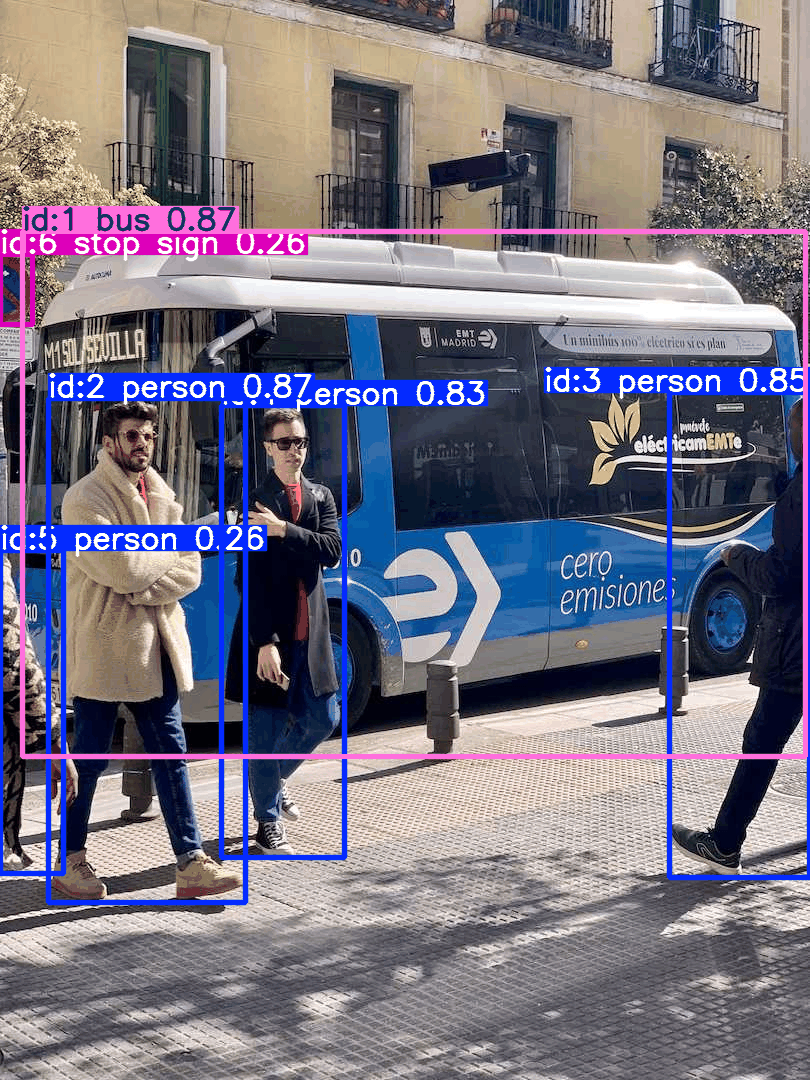

In [6]:
IPyImage('web_cam_tracking.gif', format='png', width=15 * 40, height=3 * 40) 

### Traffic scene

In [3]:
model = YOLO('yolov8n.pt')

In [ ]:
def show_frame(img):
    """
    Displays an image frame. Automatically detects the execution environment.
    Args:
        img (numpy.ndarray): The image frame to be displayed.
    """
    try:
        from google.colab.patches import cv2_imshow
        from IPython.display import clear_output
        clear_output(wait=True)  # Clear the output to prevent image accumulation
        cv2_imshow(img)  
    except ImportError:
        cv2.imshow("YOLOv8 Tracking", img)
        
traffic_url_1 = "https://github.com/ezponda/intro_deep_learning/raw/main/images/road_traffic_video_for_object_recognition_short.mp4"


# Open the video file
cap = cv2.VideoCapture(traffic_url_1)

# Loop through the video frames
while cap.isOpened():
    success, frame = cap.read()
    
    if success:
        # Run YOLOv8 tracking on the frame
        results = model.track(frame, persist=True, verbose=False)
        result = results[0]

        # Visualize and display the results
        annotated_frame = result.plot()
        show_frame(annotated_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'): # Press 'q' to quit
            break
    else:
        break

# Cleanup
cap.release()
cv2.destroyAllWindows()

In [ ]:
print(result)

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

In [ ]:
help(result)

In [ ]:
help(result.boxes)

In [10]:
print(result.boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([6., 2., 2., 2., 2., 5., 2., 2., 2., 2., 2., 2., 2.])
conf: tensor([0.5935, 0.1595, 0.6612, 0.3966, 0.6474, 0.5743, 0.7439, 0.5167, 0.6821, 0.6373, 0.6702, 0.2231, 0.4623])
data: tensor([[4.9369e+02, 9.9087e+01, 6.3902e+02, 1.4312e+02, 1.4000e+01, 5.9350e-01, 6.0000e+00],
        [2.4870e+02, 1.5138e+02, 2.7195e+02, 1.7083e+02, 5.7600e+02, 1.5945e-01, 2.0000e+00],
        [2.7679e+02, 1.5993e+02, 2.9340e+02, 1.7291e+02, 5.9800e+02, 6.6117e-01, 2.0000e+00],
        [2.1002e+02, 1.6697e+02, 2.2862e+02, 1.8132e+02, 6.1100e+02, 3.9659e-01, 2.0000e+00],
        [2.3717e+02, 1.7131e+02, 2.5716e+02, 1.8842e+02, 6.4100e+02, 6.4743e-01, 2.0000e+00],
        [1.1358e+02, 1.5368e+02, 2.0472e+02, 2.3146e+02, 6.8400e+02, 5.7426e-01, 5.0000e+00],
        [2.5346e+02, 1.8954e+02, 2.7666e+02, 2.0929e+02, 7.0000e+02, 7.4387e-01, 2.0000e+00],
        [5.4952e+02, 2.6432e+02, 6.1310e+02, 3.1758e+02, 7.3600e+02, 5.1669e-01, 2.0000e+00],

In [ ]:
print('Classes detected', result.boxes.cls.numpy())
print('Total classes', result.names)

Classes detected [          6           2           2           2           2           5           2           2           2           2           2           2           2]
Total classes {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake'

## Question 1: Counting the Total Appearances of Trucks

Count the total number of truck appearances across all frames in the video. Trucks are identified with the class index that appears in `result.names` . Your task is to complete the code such that it correctly counts the number of times trucks appear in the video frames. Take note of how the results are processed and how you can utilize the information contained within `result.boxes`.


In [7]:
from collections import Counter

def show_frame(img):
    """
    Displays an image frame. Automatically detects the execution environment.
    Args:
        img (numpy.ndarray): The image frame to be displayed.
    """
    try:
        from google.colab.patches import cv2_imshow
        from IPython.display import clear_output
        clear_output(wait=True)  # Clear the output to prevent image accumulation
        cv2_imshow(img)  
    except ImportError:
        cv2.imshow("YOLOv8 Tracking", img)

traffic_url_1 = "https://github.com/ezponda/intro_deep_learning/raw/main/images/road_traffic_video_for_object_recognition_short.mp4"

# Open the video file
cap = cv2.VideoCapture(traffic_url_1)

truck_counts = 0

# Loop through the video frames
while cap.isOpened():
    success, frame = cap.read()
    
    if success:
        # Run YOLOv8 tracking on the frame
        results = model.track(frame, persist=True, verbose=False)
        result = results[0]
        
        # complete code
        class_counts = Counter(result.boxes.cls.tolist())
        if 7 in class_counts:
            truck_counts += class_counts[7]

        # Visualize and display the results
        annotated_frame = result.plot()
        show_frame(annotated_frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'): # Press 'q' to quit
            break
    else:
        break

# Cleanup
cap.release()
cv2.destroyAllWindows()

In [10]:
cap.release()
cv2.destroyAllWindows()

In [8]:
print(f"Total truck appearances: {truck_counts}")

Total truck appearances: 952


## Question 2: Counting Unique Trucks in the Video

Modify the code to count the number of unique trucks that appear throughout the video. This involves tracking individual trucks across frames. Each detected truck has a unique tracking ID when tracking is enabled in YOLOv8. Utilize these IDs to identify unique trucks over the entire video. Implement the modifications necessary to count these unique instances.



In [11]:
from collections import Counter

# Initialize the video
cap = cv2.VideoCapture(traffic_url_1)
unique_truck_ids = set()  # Set to store unique truck IDs

# Process video frames
while cap.isOpened():
    success, frame = cap.read()
    if success:
        # Detect and track objects in the current frame
        results = model.track(frame, persist=True, verbose=False)
        result = results[0]

        # TODO: Modify the code to track unique truck IDs
        for i, cls_id in enumerate(result.boxes.cls.tolist()):
            if cls_id == 7:  # Check if the class is a truck
                track_id = result.boxes.id[i].item()  # Retrieve the tracking ID
                unique_truck_ids.add(track_id)  # Add to the set of unique truck IDs

        # Display annotated frame
        annotated_frame = result.plot()
        show_frame(annotated_frame)

        if cv2.waitKey(1) & 0xFF == ord('q'): # Press 'q' to exit
            break
    else:
        break

# Cleanup and display result
cap.release()
cv2.destroyAllWindows()

In [21]:
import cv2

win_name = "YOLO-Tracking"
cv2.namedWindow(win_name, cv2.WINDOW_NORMAL)   # 先创建窗口，避免事件不响应

cap = cv2.VideoCapture(traffic_url_1)
unique_truck_ids = set()

try:
    while cap.isOpened():
        ok, frame = cap.read()
        if not ok:
            break

        # 检测 + 跟踪（persist=True 让跟踪器保持状态）
        results = model.track(frame, persist=True, verbose=False)
        r = results[0]

        # 取出类别与track id（注意：有时id可能为None，或类型是float）
        boxes = r.boxes
        cls_list = boxes.cls.int().cpu().tolist() if boxes.cls is not None else []
        id_list  = boxes.id.int().cpu().tolist()  if boxes.id  is not None else []

        # 统计"truck"（COCO里 truck 的类 id 为 7）
        for cls_id, track_id in zip(cls_list, id_list):
            if cls_id == 7 and track_id is not None:
                unique_truck_ids.add(int(track_id))

        # 画好框/ID，并叠加统计文字
        annotated = r.plot()  # BGR
        cv2.putText(
            annotated,
            f"Unique trucks: {len(unique_truck_ids)}",
            (12, 28),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.9,
            (0, 255, 0),
            2,
            cv2.LINE_AA,
        )

        # 仅用 OpenCV 显示（避免和 plt 冲突）
        cv2.imshow(win_name, annotated)

        # 按 q 或 Esc 退出
        key = cv2.waitKey(1) & 0xFF
        if key in (ord('q'), 27):
            break
finally:
    cap.release()
    # 多等几次，确保事件队列清空后再关窗口，防止“关不掉”
    for _ in range(5):
        cv2.waitKey(1)
    cv2.destroyAllWindows()

print(f"Total unique trucks: {len(unique_truck_ids)}")


Total unique trucks: 58


In [23]:
import cv2, time
for _ in range(15):
    cv2.waitKey(1)
    time.sleep(0.01)
try:
    cv2.destroyAllWindows()
    for _ in range(15):
        cv2.waitKey(1)
        time.sleep(0.01)
except Exception:
    pass


In [22]:
cap.release()
cv2.destroyAllWindows()

In [13]:
print(f"Number of unique trucks: {len(unique_truck_ids)}")

Number of unique trucks: 58


## Counting Objects within a Region of Interest

In this section, we explore how to focus our object detection efforts on specific areas of an image, known as Regions of Interest (ROI). Defining an ROI allows us to concentrate on particular parts of an image while ignoring irrelevant areas, making our object detection tasks more efficient and relevant.

We will utilize a custom class, `ObjectCounter`, designed to count unique objects within the specified ROI. The ROI is defined by two points: the top-left corner `(x1, y1)` and the bottom-right corner `(x2, y2)`. These points outline a rectangular area in the image where our object detection and counting will be focused.

In [24]:
class ObjectCounter:
    """
    A class for counting unique objects of specific classes within a specified region of interest (ROI) in video frames.
    Now processes detection results directly.
    

    Attributes:
        roi (tuple): The region of interest, defined as (x1, y1, x2, y2).
        class_names (list): A list of class names to be counted.
        unique_objects (dict): A dictionary to keep track of unique object IDs within the ROI, categorized by class.

    Methods:
        is_within_roi(box): Determines whether an object's bounding box is within the ROI.
        update(result): Processes and updates counts based on the detection result.
        get_count(): Returns the count of unique objects detected within the ROI, categorized by class.
    """

    def __init__(self, roi, class_names=None):
        """
        Initializes the ObjectCounter with a region of interest.

        Args:
            roi (tuple): The region of interest, defined as (x1, y1, x2, y2).
            class_names (list or None): Specific class names to count within the ROI.
        """
        self.roi = roi
        self.unique_objects = {}
        self.class_names = class_names

    def is_within_roi(self, box):
        """
        Determines whether the center of an object's bounding box is within the region of interest.
        
        - (x1, y1) are the coordinates of the top-left corner of a region within the image. Here, x1 corresponds to the column index, and y1 corresponds to the row index.
        - (x2, y2) are the coordinates of the bottom-right corner of the region. Similarly, x2 corresponds to the column index, and y2 corresponds to the row index.

        Args:
            box (list or numpy.ndarray): The bounding box of an object, in the format [x1, y1, x2, y2].

        Returns:
            bool: True if the object is within the ROI, False otherwise.
        """
        x_center = (box[0] + box[2]) / 2
        y_center = (box[1] + box[3]) / 2
        return self.roi[0] < x_center < self.roi[2] and self.roi[1] < y_center < self.roi[3]

    def update(self, result):
        """
        Processes the detection result and updates the counts of unique objects within the ROI.

        Args:
            result (ultralytics.YOLOv5.detect.Detections): The detection results from YOLOv5.
        """
        boxes = [box.xyxy[0].cpu().numpy().flatten() for box in result.boxes]
        ids = [box.id.item() for box in result.boxes]
        classes = [result.names[box.cls.item()] for box in result.boxes]

        for box, obj_id, cls_name in zip(boxes, ids, classes):
            if self.is_within_roi(box):
                # Ensure we're tracking this class, and update the counter if so
                if self.class_names is None or cls_name in self.class_names:
                    if cls_name not in self.unique_objects:
                        self.unique_objects[cls_name] = set()
                    self.unique_objects[cls_name].add(obj_id)

    def get_count(self):
        """
        Returns the count of unique objects detected within the ROI, categorized by class.

        Returns:
            dict: The counts of unique objects within the ROI, categorized by class.
        """
        return {cls: len(ids) for cls, ids in self.unique_objects.items()}

In [25]:
import cv2  # Make sure OpenCV is installed and imported

def show_frame(img, roi=None):
    """
    Displays an image frame with an optional ROI. Automatically detects the execution environment.
    
    Args:
        img (numpy.ndarray): The image frame to be displayed.
        roi (tuple, optional): The region of interest defined as (x1, y1, x2, y2). If None, no ROI is drawn.
    """
    # Draw the ROI on the frame if specified
    if roi is not None:
        x1, y1, x2, y2 = roi
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 3)  # Draw rectangle with green line

    try:
        from google.colab.patches import cv2_imshow
        from IPython.display import clear_output
        clear_output(wait=True)  # Clear the output to prevent image accumulation
        cv2_imshow(img)  
    except ImportError:
        cv2.imshow("Frame with ROI", img)

In [26]:
# Define the region of interest and classes of interest
roi = (100, 100, 400, 400)  # Adjust based on your video content
class_names = ['truck', 'car', 'bicycle']  # Count these classes. Set to None to count all classes.

object_counter = ObjectCounter(roi, class_names)

cap = cv2.VideoCapture(traffic_url_1)

# Process video frames
while cap.isOpened():
    success, frame = cap.read()
    if success:
        # Detect and track objects in the current frame
        results = model.track(frame, persist=True, verbose=False)
        result = results[0]

        # Update the object counter with detected objects
        object_counter.update(result)

        # Display annotated frame (this part remains unchanged)
        annotated_frame = result.plot()
        show_frame(annotated_frame, roi)

        if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to exit
            break
    else:
        break

# Cleanup
cap.release()
cv2.destroyAllWindows()

In [28]:
import cv2, time
for _ in range(15):
    cv2.waitKey(1)
    time.sleep(0.01)
try:
    cv2.destroyAllWindows()
    for _ in range(15):
        cv2.waitKey(1)
        time.sleep(0.01)
except Exception:
    pass

In [27]:
print("Unique objects within ROI:", object_counter.get_count())

Unique objects within ROI: {'car': 91, 'truck': 42}


## Question 4: Calculating the Lane-wise Difference in Truck Counts

In this exercise, you will modify the object tracking system to differentiate between trucks passing through two distinct lanes of a road: the left lane and the right lane. You will define two Regions of Interest (ROIs), one for each lane, and count the number of unique trucks that pass through each. Finally, you will calculate the difference between the number of trucks passing through the right lane and the left lane.

### Instructions:

1. Define two separate ROIs: one for the left lane and one for the right lane. These should be based on your video's specific lane positions.
2. Use two instances of the `ObjectCounter` class, one for each lane, to count the number of trucks passing through.
3. After processing the video, calculate the difference between the counts of unique trucks in the right lane and the left lane.

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 4))
plt.imshow(annotated_frame[:,:,::-1])  # Display the image in RGB format
plt.show()  # Display the plot

In [29]:
# Define the ROIs for the left and right lanes
left_lane_roi = (0, 250, 250, 350) # (x1_left, y1_left, x2_left, y2_left)
right_lane_roi = (350, 250, 660, 350) #(x1_right, y1_right, x2_right, y2_right)

# Initialize the ObjectCounter for each lane
left_lane_counter = ObjectCounter(left_lane_roi, class_names=['truck'])
right_lane_counter = ObjectCounter(right_lane_roi, class_names=['truck'])

# Process video frames
cap = cv2.VideoCapture(traffic_url_1)  # Replace 'traffic_url_1' with your video file path
while cap.isOpened():
    success, frame = cap.read()
    if success:
        # Detect and track objects in the current frame
        results = model.track(frame, persist=True, verbose=False)
        result = results[0]
        
        # Update the object counters for each lane
        left_lane_counter.update(result)
        right_lane_counter.update(result)

        # Display annotated frame with the ROIs
        annotated_frame = result.plot()
        show_frame(annotated_frame, left_lane_roi)
        show_frame(annotated_frame, right_lane_roi)

        if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to exit
            break
    else:
        break

# Cleanup
cap.release()
cv2.destroyAllWindows()

In [30]:
# Calculate and print the difference in truck counts between the lanes
left_lane_trucks = left_lane_counter.get_count().get('truck', 0)
right_lane_trucks = right_lane_counter.get_count().get('truck', 0)
difference = right_lane_trucks - left_lane_trucks
print(f"Truck count difference (Right lane - Left lane): {difference}")

Truck count difference (Right lane - Left lane): -3


In [31]:
left_lane_trucks, right_lane_trucks

(15, 12)

In [32]:
import cv2, time
for _ in range(15):
    cv2.waitKey(1)
    time.sleep(0.01)
try:
    cv2.destroyAllWindows()
    for _ in range(15):
        cv2.waitKey(1)
        time.sleep(0.01)
except Exception:
    pass

## Extra: [Workouts Monitoring using Ultralytics](https://docs.ultralytics.com/guides/workouts-monitoring/)

In [33]:
from ultralytics import YOLO
from ultralytics.solutions import ai_gym
import cv2

model = YOLO("yolov8n-pose.pt")
cap = cv2.VideoCapture("path/to/video")
assert cap.isOpened(), "Error reading video file"
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))

video_writer = cv2.VideoWriter("workouts.avi",
                                cv2.VideoWriter_fourcc(*'mp4v'),
                                fps,
                                (w, h))

gym_object = ai_gym.AIGym()  # init AI GYM module
gym_object.set_args(line_thickness=2,
                    view_img=True,
                    pose_type="pushup",
                    kpts_to_check=[6, 8, 10])

frame_count = 0
while cap.isOpened():
    success, frame = cap.read()
    if not success:
      print("Video frame is empty or video processing has been successfully completed.")
      break
    frame_count += 1
    results = model.predict(frame, verbose=False)
    frame = gym_object.start_counting(frame, results, frame_count)
    cv2.imshow("Push-up Detection", frame)
    video_writer.write(frame)

cv2.destroyAllWindows()
video_writer.release()

OpenCV: Couldn't read video stream from file "path/to/video"


AssertionError: Error reading video file